<a href="https://colab.research.google.com/github/26Kenn07/Machine-Learning-Projects/blob/main/Dermatology_Dataset_(Multi_class_classification)_Using_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/dermatology_database_1.csv')

In [3]:
df.head()

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0         2        2                 0        3                   0   
1         3        3                 3        2                   1   
2         2        1                 2        3                   1   
3         2        2                 2        0                   0   
4         2        3                 2        2                   2   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                  0                   0                         0   
1                  0                   0                         0   
2                  3                   0                         3   
3                  0                   0                         0   
4                  2                   0                         2   

   knee_and_elbow_involvement  scalp_involvement  ...  \
0                           1                  0  ...   
1                           1                  1  ...   
2                           0                  0  ...   
3                           3                  2  ...   
4                           0                  0  ...   

   disappearance_granular_layer  vacuolisation_damage_basal_layer  spongiosis  \
0                             0                                 0           3   
1                             0                                 0           0   
2                             0                                 2           3   
3                             3                                 0           0   
4                             2                                 3           2   

   saw_tooth_appearance_retes  follicular_horn_plug  \
0                           0                     0   
1                           0                     0   
2                           2                     0   
3                           0                     0   
4                           3                     0   

   perifollicular_parakeratosis  inflammatory_mononuclear_infiltrate  \
0                             0                                    1   
1                             0                                    1   
2                             0                                    2   
3                             0                                    3   
4                             0                                    2   

   band_like_infiltrate  age  class  
0                     0   55      2  
1                     0    8      1  
2                     3   26      3  
3                     0   40      1  
4                     3   45      3  

[5 rows x 35 columns]

In [4]:
df.shape

(366, 35)

In [5]:
df.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_infiltrate', 'PNL_infiltrate', 'fibrosis_papillary_dermis',
       'exocytosis', 'acanthosis', 'hyperkeratosis', 'parakeratosis',
       'clubbing_rete_ridges', 'elongation_rete_ridges',
       'thinning_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_granular_layer', 'vacuolisation_damage_basal_layer',
       'spongiosis', 'saw_tooth_appearance_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_mononuclear_infiltrate',
       'band_like_infiltrate', 'age', 'class'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   erythema                             366 non-null    int64 
 1   scaling                              366 non-null    int64 
 2   definite_borders                     366 non-null    int64 
 3   itching                              366 non-null    int64 
 4   koebner_phenomenon                   366 non-null    int64 
 5   polygonal_papules                    366 non-null    int64 
 6   follicular_papules                   366 non-null    int64 
 7   oral_mucosal_involvement             366 non-null    int64 
 8   knee_and_elbow_involvement           366 non-null    int64 
 9   scalp_involvement                    366 non-null    int64 
 10  family_history                       366 non-null    int64 
 11  melanin_incontinence                 366 non-

In [7]:
df.isnull().sum()

erythema                               0
scaling                                0
definite_borders                       0
itching                                0
koebner_phenomenon                     0
polygonal_papules                      0
follicular_papules                     0
oral_mucosal_involvement               0
knee_and_elbow_involvement             0
scalp_involvement                      0
family_history                         0
melanin_incontinence                   0
eosinophils_infiltrate                 0
PNL_infiltrate                         0
fibrosis_papillary_dermis              0
exocytosis                             0
acanthosis                             0
hyperkeratosis                         0
parakeratosis                          0
clubbing_rete_ridges                   0
elongation_rete_ridges                 0
thinning_suprapapillary_epidermis      0
spongiform_pustule                     0
munro_microabcess                      0
focal_hypergranu

In [8]:
df['class'].unique()

array([2, 1, 3, 5, 4, 6])

In [9]:
df['age'].unique()

array(['55', '8', '26', '40', '45', '41', '18', '57', '22', '30', '20',
       '21', '10', '65', '38', '23', '17', '51', '42', '44', '33', '43',
       '50', '34', '?', '15', '46', '62', '35', '48', '12', '52', '60',
       '32', '19', '29', '25', '36', '13', '27', '31', '28', '64', '39',
       '47', '16', '0', '7', '70', '37', '61', '67', '56', '53', '24',
       '58', '49', '63', '68', '9', '75'], dtype=object)

In [10]:
# Convert non-numeric values to NaN
df['age'] = pd.to_numeric(df['age'], errors='coerce')

In [11]:
# Calculate the mean of the 'age' column, excluding NaN values
mean_age = df['age'].mean(skipna=True)

In [12]:
# Replace NaN values with the mean
df['age'] = df['age'].fillna(mean_age)

In [13]:
df['age'] = df['age'].astype('int')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   erythema                             366 non-null    int64
 1   scaling                              366 non-null    int64
 2   definite_borders                     366 non-null    int64
 3   itching                              366 non-null    int64
 4   koebner_phenomenon                   366 non-null    int64
 5   polygonal_papules                    366 non-null    int64
 6   follicular_papules                   366 non-null    int64
 7   oral_mucosal_involvement             366 non-null    int64
 8   knee_and_elbow_involvement           366 non-null    int64
 9   scalp_involvement                    366 non-null    int64
 10  family_history                       366 non-null    int64
 11  melanin_incontinence                 366 non-null    int64

**Data Visualization**

In [15]:
sns.pairplot(df,hue='class')
plt.show()

HeatMap

In [16]:
correlation_matrix = df.corr()

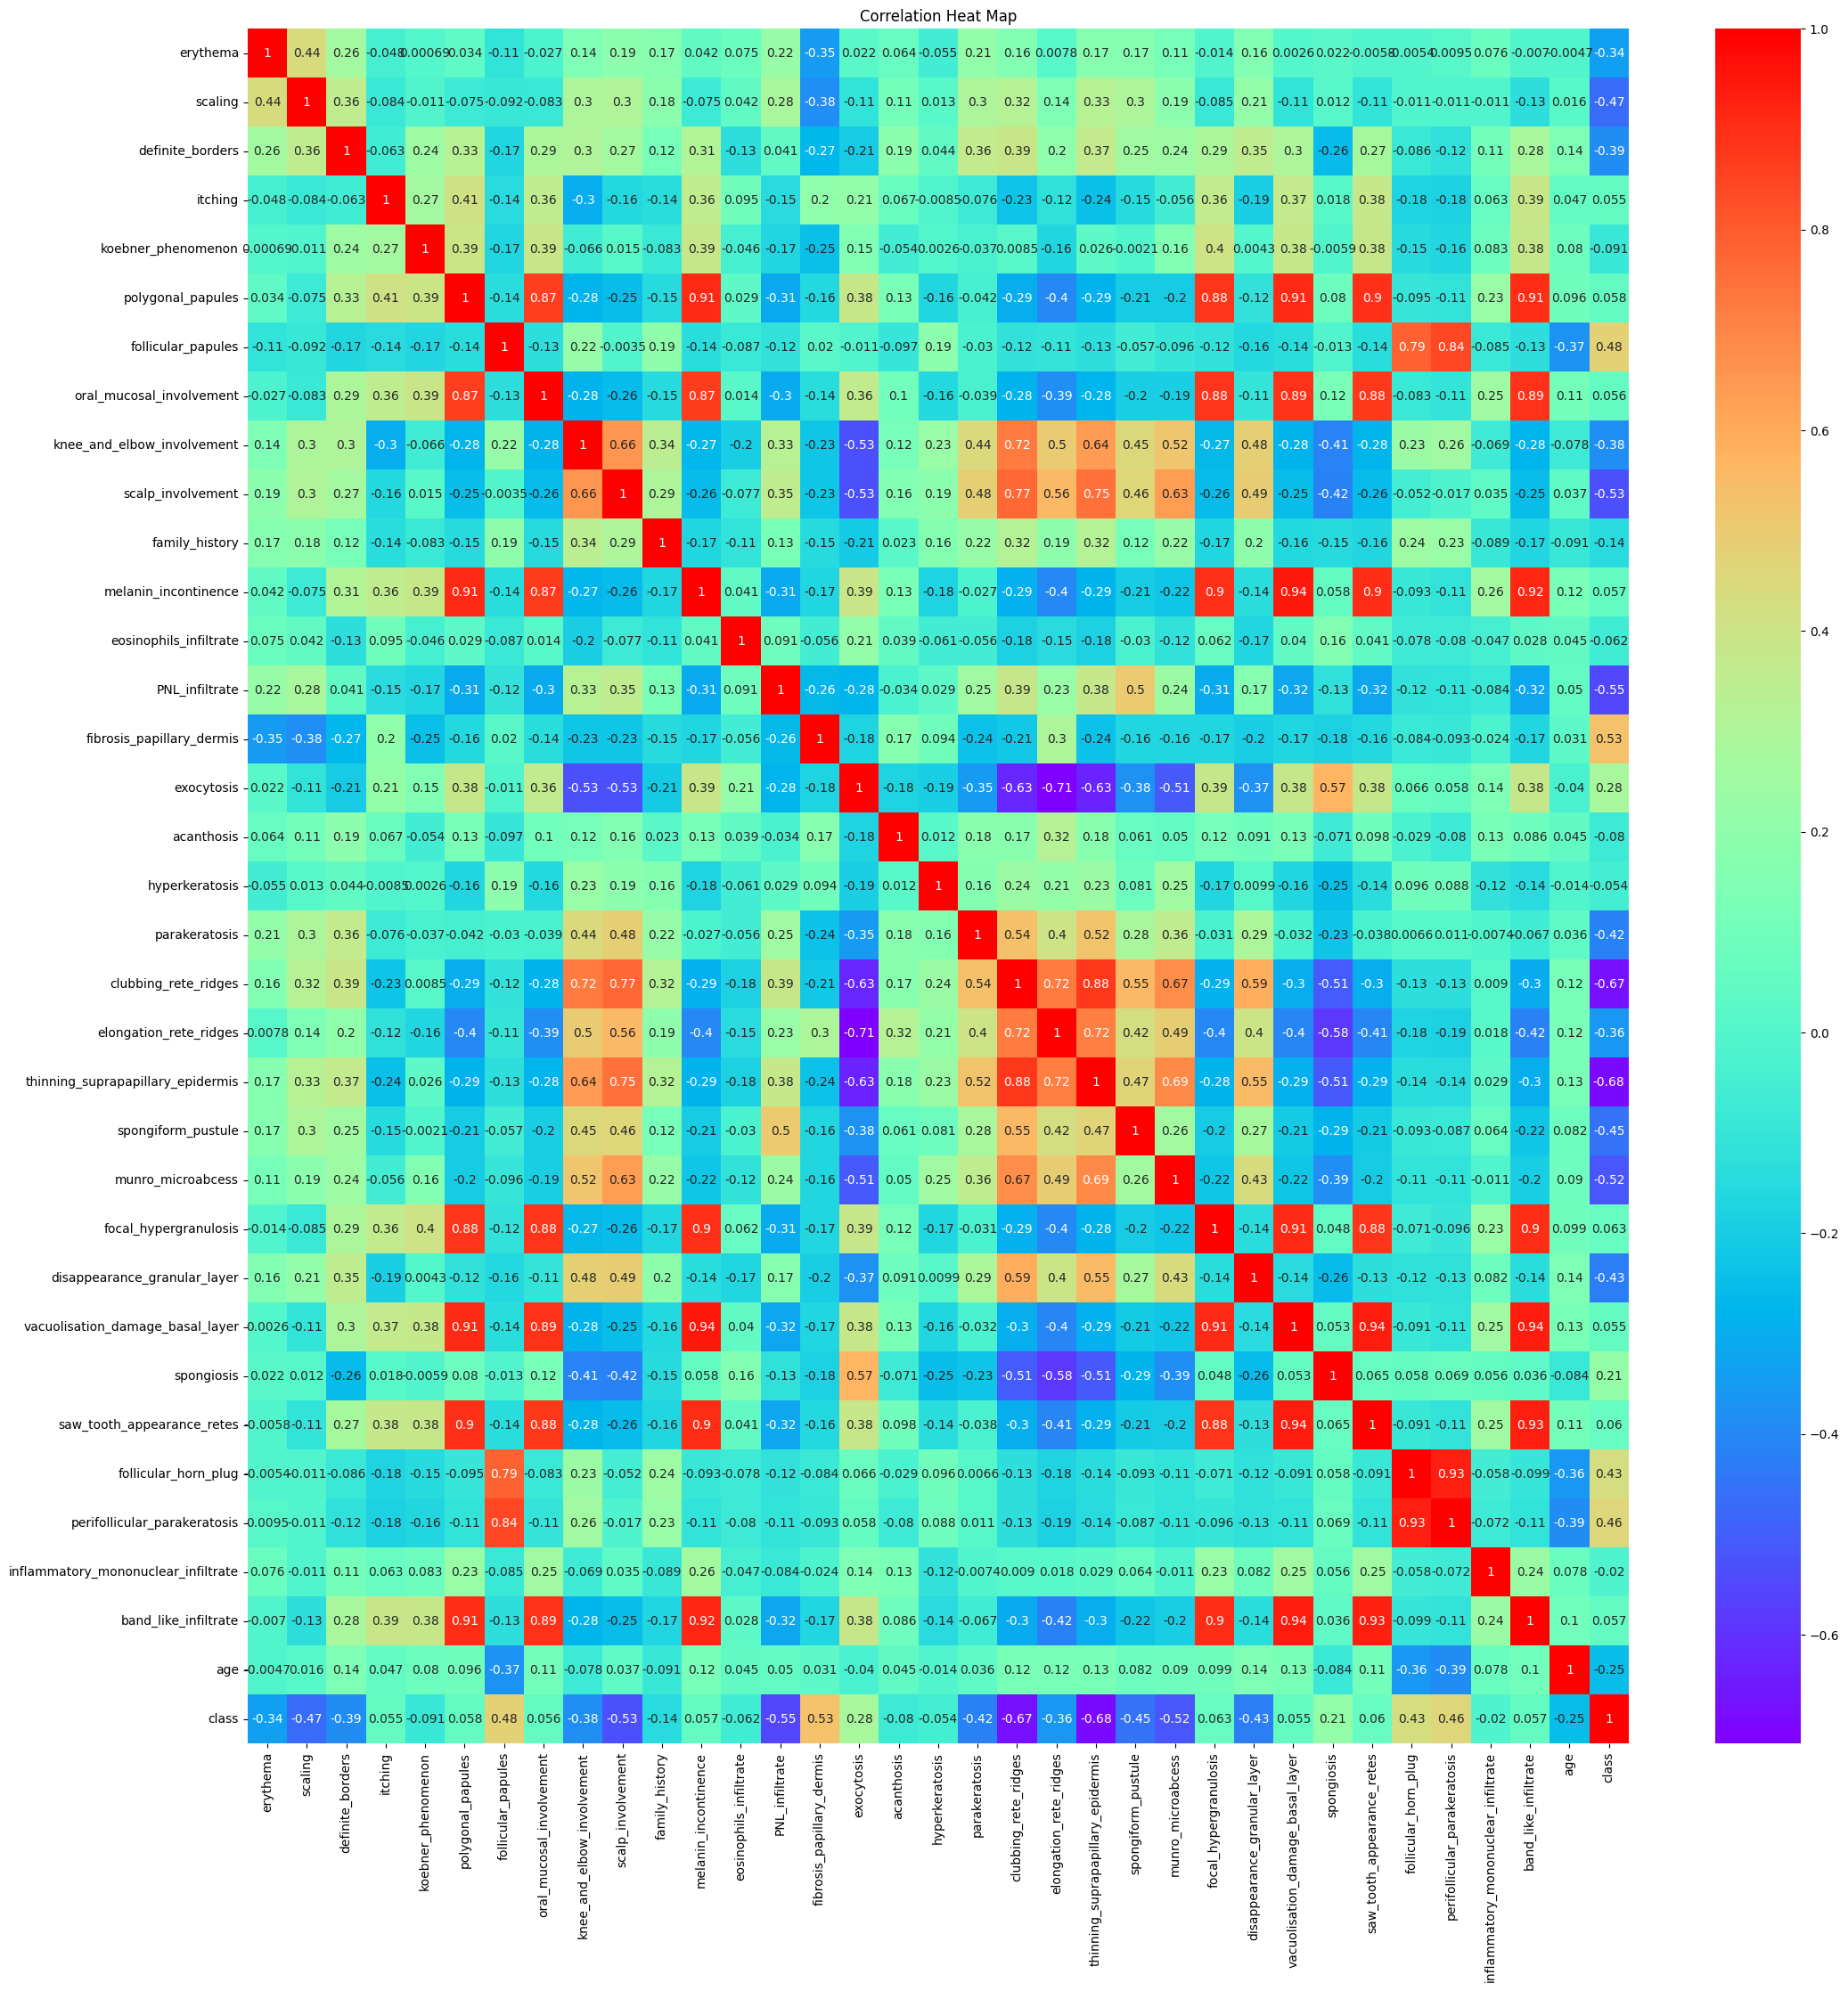

In [17]:
plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrix, annot=True, cmap='rainbow')
plt.title('Correlation Heat Map')
plt.show()

Train & Test Split

In [18]:
X = df.iloc[:,:-1]
X

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0           2        2                 0        3                   0   
1           3        3                 3        2                   1   
2           2        1                 2        3                   1   
3           2        2                 2        0                   0   
4           2        3                 2        2                   2   
..        ...      ...               ...      ...                 ...   
361         2        1                 1        0                   1   
362         3        2                 1        0                   1   
363         3        2                 2        2                   3   
364         2        1                 3        1                   2   
365         3        2                 2        0                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                    0                   0                         0   
1                    0                   0                         0   
2                    3                   0                         3   
3                    0                   0                         0   
4                    2                   0                         2   
..                 ...                 ...                       ...   
361                  0                   0                         0   
362                  0                   0                         0   
363                  2                   0                         2   
364                  3                   0                         2   
365                  0                   0                         0   

     knee_and_elbow_involvement  scalp_involvement  ...  \
0                             1                  0  ...   
1                             1                  1  ...   
2                             0                  0  ...   
3                             3                  2  ...   
4                             0                  0  ...   
..                          ...                ...  ...   
361                           0                  0  ...   
362                           0                  0  ...   
363                           0                  0  ...   
364                           0                  0  ...   
365                           3                  3  ...   

     focal_hypergranulosis  disappearance_granular_layer  \
0                        0                             0   
1                        0                             0   
2                        2                             0   
3                        0                             3   
4                        2                             2   
..                     ...                           ...   
361                      0                             0   
362                      0                             1   
363                      3                             0   
364                      3                             0   
365                      0                             2   

     vacuolisation_damage_basal_layer  spongiosis  saw_tooth_appearance_retes  \
0                                   0           3                           0   
1                                   0           0                           0   
2                                   2           3                           2   
3                                   0           0                           0   
4                                   3           2                           3   
..                                ...         ...                         ...   
361                                 0           1                           0   
362                                 0           1                           0   
363                                 3           0                           3   
364                    

In [19]:
y = df.iloc[:,-1:]
y

class
0        2
1        1
2        3
3        1
4        3
..     ...
361      4
362      4
363      3
364      3
365      1

[366 rows x 1 columns]

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

**Normalization**

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
MM = MinMaxScaler()

In [24]:
X_train_MM = MM.fit_transform(X_train)

In [25]:
X_test_MM = MM.transform(X_test)

In [26]:
y_train_1d = np.ravel(y_train)

**SVM & Bayesian(for best hyper parameter)**

In [27]:
from sklearn.svm import SVC

In [28]:
S = SVC()

In [29]:
from sklearn.model_selection import cross_val_score
from hyperopt import hp,tpe,fmin,Trials,STATUS_OK

In [30]:
Space = {
    'C' : hp.uniform('C',1,5),
    'kernel' : hp.choice('kernel',['linear', 'poly', 'rbf', 'sigmoid']),
}

In [31]:
def Bayesian(Space):
  S = SVC(
      C = float(Space['C']),
      kernel = Space['kernel']
  )
  accuracy = cross_val_score(S,X_train_MM,y_train_1d,cv=5).mean()
  return {'loss':-accuracy , 'status':STATUS_OK}

In [32]:
trials = Trials()

In [33]:
Best = fmin(fn=Bayesian,space=Space,algo=tpe.suggest,trials=trials,max_evals=200)

100%|██████████| 200/200 [00:06<00:00, 29.32trial/s, best loss: -0.9761542957334892]


In [34]:
Best

{'C': 1.2912731357137588, 'kernel': 3}

In [35]:
S = SVC(C = 1.2908790674779524, kernel = 'sigmoid')

In [36]:
S.fit(X_train_MM,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.2908790674779524, kernel='sigmoid')

In [37]:
y_hat = S.predict(X_test_MM)

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [39]:
print(accuracy_score(y_test,y_hat))

0.9864864864864865


In [40]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.99        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74



In [41]:
print(confusion_matrix(y_test,y_hat))

[[31  0  0  0  0  0]
 [ 0  9  0  0  0  0]
 [ 0  0 13  0  0  0]
 [ 0  1  0  7  0  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0  0  3]]
